In [6]:
import rdkit
from rdkit import Chem
import numpy as np
import pandas as pd
import torch 
# import deepchem as dc 
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolEnumerator
import sklearn


# ??

In [7]:
filename = 'data/CYP2D6.tsv'
df = pd.read_csv(filename, sep='\t', low_memory=False)

In [8]:
# replacing spaces in column names with underscores
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [9]:
df.head()

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,...,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Action_Type,Standard_Text_Value
0,CHEMBL1294,QUINIDINE,4.0,324.42,0.0,3.17,quinidine,C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2cc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1146077,1,Scientific Literature,J Med Chem,2006.0,NaN,NaN,NaN,NaN
1,CHEMBL403313,NaN,NaN,428.49,0.0,3.09,6,CN(C)S(=O)(=O)NC(=O)CCCc1c(-c2ccc(F)cc2)[nH]c2...,IC50,'>',...,SINGLE PROTEIN,CHEMBL1141538,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,NaN,NaN,NaN,NaN
2,CHEMBL1559781,NaN,NaN,598.56,2.0,-1.20,SID11112009,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(CSc...,AC50,NaN,...,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN
3,CHEMBL408443,NaN,NaN,483.54,0.0,4.44,13,Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1141628,1,Scientific Literature,J Med Chem,2008.0,NaN,NaN,NaN,NaN
4,CHEMBL1350723,NaN,NaN,236.73,0.0,3.47,SID17406754,Nc1cccnc1Sc1ccc(Cl)cc1,AC50,NaN,...,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33771 entries, 0 to 33770
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule_ChEMBL_ID          33771 non-null  object 
 1   Molecule_Name               4782 non-null   object 
 2   Molecule_Max_Phase          3876 non-null   float64
 3   Molecular_Weight            33695 non-null  float64
 4   #RO5_Violations             33341 non-null  float64
 5   AlogP                       33341 non-null  float64
 6   Compound_Key                33770 non-null  object 
 7   Smiles                      33567 non-null  object 
 8   Standard_Type               33771 non-null  object 
 9   Standard_Relation           19059 non-null  object 
 10  Standard_Value              19061 non-null  float64
 11  Standard_Units              19759 non-null  object 
 12  pChEMBL_Value               12306 non-null  float64
 13  Data_Validity_Comment       192

In [11]:
df.describe()

,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Standard_Value,pChEMBL_Value,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Source_ID,Document_Year,Standard_Text_Value
count,3876.000000,33695.000000,33341.000000,33341.000000,1.906100e+04,12306.000000,152.000000,148.000000,148.000000,148.000000,33771.000000,33771.000000,11227.000000,0.0
mean,3.151187,372.970544,0.250892,3.259895,7.252201e+05,5.283132,15.996776,0.311824,1.733041,19.343311,0.005182,5.825235,2013.427274,NaN
std,1.647826,119.464651,0.558092,1.691677,2.613697e+07,0.780812,6.426996,0.119215,1.861291,29.930740,0.071800,4.885459,4.960393,NaN
min,-1.000000,32.050000,0.000000,-13.050000,-5.800000e+01,4.000000,4.530000,0.090000,-3.770000,1.700000,0.000000,1.000000,1993.000000,NaN
25%,3.000000,300.360000,0.000000,2.310000,6.310000e+02,4.700000,11.327500,0.230000,0.287500,7.112500,0.000000,1.000000,2010.000000,NaN
50%,4.000000,362.410000,0.000000,3.320000,7.943300e+03,5.100000,15.680000,0.310000,1.790000,10.470000,0.000000,7.000000,2013.000000,NaN
75%,4.000000,431.520000,0.000000,4.320000,2.000000e+04,5.600000,18.810000,0.370000,2.992500,15.357500,0.000000,7.000000,2017.000000,NaN
max,4.000000,2296.970000,4.000000,13.200000,1.000000e+09,10.350000,51.070000,0.940000,5.490000,206.760000,1.000000,54.000000,2022.000000,NaN


<Axes: >

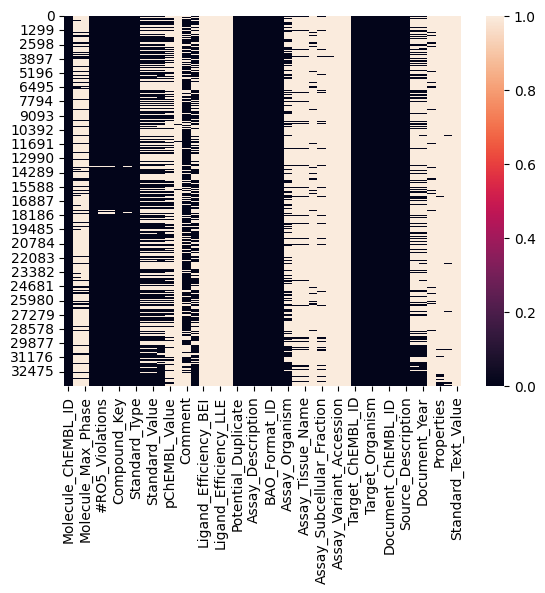

In [12]:
# checking for locations of null values
sns.heatmap(df.isna())

In [13]:
# verifying that all targets are human
df.Target_Organism.value_counts()

Target_Organism
Homo sapiens    33771
Name: count, dtype: int64

In [14]:

df.Standard_Type.value_counts()

Standard_Type
AC50                          17143
IC50                           7414
Potency                        3649
Inhibition                     3053
Ki                             1056
Activity                        476
INH                             291
Drug metabolism                 188
FC                              151
TDI                              99
Km                               35
Vmax                             32
Compound recovery                29
EC50                             26
Ratio IC50                       25
T1/2                             16
CL                               14
IC20                             13
Kinact                           11
Stability                        11
IC90                              8
IC                                7
Ratio                             4
PPB                               4
Drug uptake                       3
Vmax/Km                           3
Control of P-450 marker           2
PB            

In [15]:
df[['Standard_Type', 'Standard_Units']].value_counts() 

Standard_Type            Standard_Units
IC50                     nM                6326
AC50                     nM                5702
Potency                  nM                3649
Inhibition               %                 3048
INH                      uM                 283
Activity                 %                  230
Ki                       nM                 184
Drug metabolism          %                   72
Km                       nM                  33
Activity                 uM                  29
EC50                     nM                  26
T1/2                     hr                  16
TDI                      %                   13
IC20                     uM                  13
Compound recovery        %                   11
CL                       uL/min              11
Stability                %                   11
Kinact                   min-1                9
IC90                     nM                   8
IC                       uM                   7


In [16]:
df.Data_Validity_Comment.value_counts()

Data_Validity_Comment
Outside typical range            189
Potential transcription error      3
Name: count, dtype: int64

In [17]:
df.Assay_Type.value_counts()

Assay_Type
F    17147
A    14641
B     1982
T        1
Name: count, dtype: int64

In [18]:
df.Standard_Value.isna().value_counts()

Standard_Value
False    19061
True     14710
Name: count, dtype: int64

# Learning Python Multiprocessing

In [52]:
import time

In [37]:
all_smiles = df.Smiles
all_smiles[:5]

0    C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2cc...
1    CN(C)S(=O)(=O)NC(=O)CCCc1c(-c2ccc(F)cc2)[nH]c2...
2    CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(CSc...
3    Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](...
4                               Nc1cccnc1Sc1ccc(Cl)cc1
Name: Smiles, dtype: object

In [51]:
del df 

In [23]:
from rdkit.Chem import rdFingerprintGenerator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

In [29]:
mol = Chem.MolFromSmiles(all_smiles[0])
np.array(mfpgen.GetFingerprint(mol))

array([0, 1, 0, ..., 0, 1, 0])

In [55]:
# not parallelized

from tqdm import tqdm
all_fps = []
start = time.time()
# all_smiles = [smiles for smiles in all_smiles if smiles]
for smiles in tqdm(all_smiles[~all_smiles.isna()]):
    if smiles != None:
        mol = Chem.MolFromSmiles(smiles)
        fp = mfpgen.GetFingerprint(mol)
        fp_as_np = np.array(fp)
        all_fps.append(fp_as_np)

print(f'Total time for non-parallel: {time.time()-start}')

100%|███████████████████████████████████████████████████████████████████████████████████| 33567/33567 [00:40<00:00, 836.40it/s]

Total time for non-parallel: 40.142406940460205


In [ ]:
def generate_fps(smiles_list):
    for smiles in tqdm(smiles_list[~smiles_list.isna()]):
        if smiles != None:
            mol = Chem.MolFromSmiles(smiles)
            fp = mfpgen.GetFingerprint(mol)
            fp_as_np = np.array(fp)
            all_fps.append(fp_as_np)

In [64]:
all_fps = generate_fps(all_smiles)

100%|███████████████████████████████████████████████████████████████████████████████████| 33567/33567 [00:38<00:00, 876.08it/s]


In [59]:
import multiprocessing as mp

In [83]:
# need this to do multiprocessing
if __name__ == '__main__':
    # def generate_fps(smiles_list):
    #     for smiles in tqdm(smiles_list[~smiles_list.isna()]):
    #         if smiles != None:
    #             mol = Chem.MolFromSmiles(smiles)
    #             fp = mfpgen.GetFingerprint(mol)
    #             fp_as_np = np.array(fp)
    #             all_fps.append(fp_as_np)
    
    start = time.time()
    
    smiles_p1, smiles_p2, smiles_p3, smiles_p4 = [all_smiles[(len(all_smiles)//4)*i : (len(all_smiles)//4)*(i+1)] for i in range(4)]

    # defining process 1-4
    p1 = mp.Process(target=generate_fps, args=(smiles_p1))
    p2 = mp.Process(target=generate_fps, args=(smiles_p2))
    p3 = mp.Process(target=generate_fps, args=(smiles_p3))
    p4 = mp.Process(target=generate_fps, args=(smiles_p4))

    p1.start()
    p2.start()
    p3.start()
    p4.start()

    
    print(f'Total time for parallel: {time.time()-start}')

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/christian_g/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/christian_g/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'generate_fps' on <module '__main__' (built-in)>


KeyboardInterrupt: 

In [74]:
smiles_p1, smiles_p2, smiles_p3, smiles_p4 = [all_smiles[(len(all_smiles)//4)*i : (len(all_smiles)//4)*(i+1)] for i in range(4)]

In [81]:
[smiles_p1] + [smiles_p2] + [smiles_p3] + [smiles_p4]

[0       C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2cc...
 1       CN(C)S(=O)(=O)NC(=O)CCCc1c(-c2ccc(F)cc2)[nH]c2...
 2       CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(CSc...
 3       Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](...
 4                                  Nc1cccnc1Sc1ccc(Cl)cc1
                               ...                        
 8437      Cc1snc(SCC(=O)NN=C(N)COc2cccc(C(F)(F)F)c2)c1C#N
 8438            Cn1c(=O)c2c(nc(C(=N)SCC(=O)O)n2C)n(C)c1=O
 8439                                             NCC(=O)O
 8440    COc1ccc(C(=O)C2=C(O)C(=O)N(c3cc(C)on3)C2c2ccc(...
 8441               Cc1nc2cnc(N(C)C)nc2n(C[C@H]2CCCO2)c1=O
 Name: Smiles, Length: 8442, dtype: object,
 8442     Cc1cc(C)c2nc3c(c([C@H](O)[C@@H]4CCCCN4)c2c1)CC...
 8443     COc1ccccc1Cn1nnc2c(O)nc(C3CCN(C(=O)c4ccc(C)cc4...
 8444     Cc1nc2ccc3nc(NC(=O)c4ccc(S(=O)(=O)N5CCOCC5)cc4...
 8445     CC(C)c1cccc2nc3c(c([Si](C)(C)C(C)(C)C)c12)Cn1c...
 8446                               O=C(Cn1cccc1)NC1CCCCCC1
       

In [72]:
all_smiles

0        C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2cc...
1        CN(C)S(=O)(=O)NC(=O)CCCc1c(-c2ccc(F)cc2)[nH]c2...
2        CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(CSc...
3        Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](...
4                                   Nc1cccnc1Sc1ccc(Cl)cc1
                               ...                        
33766    CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...
33767    O=C([O-])CC1CCC2(CC1)CCC(c1ccc(NC(=O)c3nnc(Nc4...
33768    Cc1nnc(C(C)C)n1[C@@H]1C[C@H]2CC[C@@H](C1)N2CC[...
33769          C#CCN(Cc1ccc(F)cc1)c1cc(C)c(NC(=O)OC)c(C)c1
33770    C=CC(=O)N[C@H]1CCOC[C@H]1Nc1ncc2cc(-c3c(Cl)c(O...
Name: Smiles, Length: 33771, dtype: object

In [98]:
all_smiles = all_smiles[~all_smiles.isna()]
pd.DataFrame(all_smiles).to_csv('CYP2D6_smiles.csv')

In [92]:
pd.DataFrame(all_smiles)

,Smiles
0,C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2cc...
1,CN(C)S(=O)(=O)NC(=O)CCCc1c(-c2ccc(F)cc2)[nH]c2...
2,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(CSc...
3,Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](...
4,Nc1cccnc1Sc1ccc(Cl)cc1
...,...
33766,CC1=C(C(=O)O[C@H](C)c2ccccc2)C(c2ccc3c(cnn3C)c...
33767,O=C([O-])CC1CCC2(CC1)CCC(c1ccc(NC(=O)c3nnc(Nc4...
33768,Cc1nnc(C(C)C)n1[C@@H]1C[C@H]2CC[C@@H](C1)N2CC[...
33769,C#CCN(Cc1ccc(F)cc1)c1cc(C)c(NC(=O)OC)c(C)c1


In [96]:
list(all_smiles)

['C=C[C@H]1CN2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc2ccc(OC)cc12',
 'CN(C)S(=O)(=O)NC(=O)CCCc1c(-c2ccc(F)cc2)[nH]c2ccc(C#N)cc12',
 'CO/N=C(\\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(CSc3nc(=O)c([O-])nn3C)CS[C@@H]12)c1csc(N)n1.[Na+].[Na+]',
 'Cc1cc2c(F)c(Oc3ncnn4cc(OC[C@@H](C)OC(=O)[C@H](N)CC(C)C)c(C)c34)ccc2[nH]1',
 'Nc1cccnc1Sc1ccc(Cl)cc1',
 'CC(C)C(=O)Nc1ccc(C(=O)NNC(=O)CCCOc2ccc(Cl)cc2Cl)cc1',
 'COc1c2c(nc3ccccc13)O[C@@H]([C@@](C)(O)CO)C2',
 'COC(=O)C(O)(c1c(C)[nH]c2ccccc12)C(F)(F)F',
 'CC(=O)Nc1ccc(O)cc1',
 'Cc1nc(N2CCN(S(=O)(=O)c3ccccc3)CC2)c2c3c(sc2n1)CC(C)CC3',
 'O=C1Nc2ccc([N+](=O)[O-])cc2C1(O)N1CCCCCC1',
 'COc1ccc(/N=C/c2ccc(CNS(=O)(=O)c3ccc(Cl)cc3)o2)cc1',
 'O=C(Nc1cccc(F)c1)N1CCCC2(CCN(C(=O)c3cc(C(F)(F)F)cc(C(F)(F)F)c3)CC2)C1',
 'O=C(COc1ccc(/C=N/NC(=O)c2ccccc2)cc1)Nc1ccc([N+](=O)[O-])cc1',
 'CN(C)c1cc(-c2cccc(NS(C)(=O)=O)c2)ncn1',
 'CS(=O)(=O)Nc1cccc(-c2ccc3ncnc(NC4CC4)c3c2)c1',
 'O=C(Nc1nccs1)N1CCC(Cc2c[nH]cn2)CC1',
 'COc1ncc2nc(C)c(=O)n(Cc3ccc(F)cc3)c2n1',
 'O=C(CCOc1ccc(C(=O)N2CCNCC2